In [0]:
import keras
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, Activation, GlobalAveragePooling2D
from keras.models import Sequential
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.applications import xception
from keras.engine import Model

In [2]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 24s 0us/step


In [3]:
x_train=x_train/255
x_test=x_test/255
x_train.shape

(50000, 32, 32, 3)

In [0]:
import scipy as sp
import numpy as np
from sklearn.metrics import classification_report

In [14]:
x_train=np.array([sp.misc.imresize(x, (72, 72)) for x in x_train])
x_test=np.array([sp.misc.imresize(x , (72,72)) for x in x_test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [16]:
y_train
x_train.shape

(50000, 72, 72, 3)

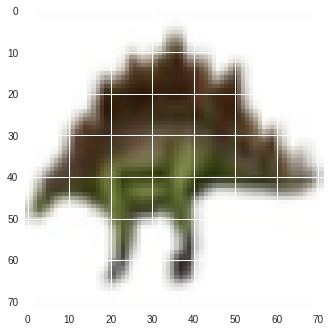

In [17]:
plt.imshow(x_train[1])

In [9]:
model=xception.Xception(weights='imagenet',include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
83689472/83683744 [==============================] - 1s 0us/step


In [0]:
x=model.output
x=GlobalAveragePooling2D()(x)
prediction=Dense(100, activation="softmax")(x)

model=Model(model.input, prediction)

In [22]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [0]:
opt=keras.optimizers.adam()

model.compile(optimizer=opt,
             metrics=['accuracy'],
             loss="sparse_categorical_crossentropy")

In [24]:
model.fit(x_train,y_train,epochs=5,batch_size=128,shuffle=True,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 297s 6ms/step - loss: 1.7210 - acc: 0.5395 - val_loss: 1.4157 - val_acc: 0.6172
Epoch 2/5
50000/50000 [==============================] - 280s 6ms/step - loss: 0.8489 - acc: 0.7482 - val_loss: 1.2754 - val_acc: 0.6447
Epoch 3/5
50000/50000 [==============================] - 280s 6ms/step - loss: 0.5476 - acc: 0.8314 - val_loss: 1.4412 - val_acc: 0.6418
Epoch 4/5
50000/50000 [==============================] - 280s 6ms/step - loss: 0.4011 - acc: 0.8741 - val_loss: 1.4363 - val_acc: 0.6446
Epoch 5/5
50000/50000 [==============================] - 281s 6ms/step - loss: 0.3079 - acc: 0.9015 - val_loss: 1.4635 - val_acc: 0.6516


In [27]:
pre=model.predict(x_test)
pre=np.argmax(pre,axis=1)
pre

array([13, 88, 72, ..., 51, 42, 70])

In [28]:
y_test

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

In [30]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.64      0.83      0.72       100
           2       0.70      0.50      0.58       100
           3       0.55      0.54      0.55       100
           4       0.62      0.30      0.41       100
           5       0.86      0.54      0.66       100
           6       0.38      0.81      0.52       100
           7       0.50      0.73      0.59       100
           8       0.75      0.86      0.80       100
           9       0.86      0.78      0.82       100
          10       0.71      0.47      0.57       100
          11       0.49      0.39      0.43       100
          12       0.65      0.63      0.64       100
          13       0.50      0.68      0.57       100
          14       0.71      0.70      0.70       100
          15       0.63      0.61      0.62       100
          16       0.69      0.75      0.72       100
          17       1.00    

In [0]:
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step
